In [3]:
import pandas as pd
import numpy as np
import snsynth as sn
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race',
         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']

adult = pd.read_csv('adult.data', sep=',\s+', header=None, names=names, na_values='?', engine='python', skipinitialspace=True)

adult.dropna(inplace=True)

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
synth_1 = sn.Synthesizer.create('aim', epsilon=1.0, delta=1e-05, verbose=True)
categorical_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
continuous_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
synth_1.fit(adult, categorical_columns=categorical_col, continuous_columns=continuous_col, preprocessor_eps=0.5)

/home/ensai/.local/lib/python3.10/site-packages/mbi/__init__.py:15: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn('MixtureInference disabled, please install jax and jaxlib')


Spent 0.49999999999999994 epsilon on preprocessor, leaving 0.5 for training
Fitting with 54001920000000 dimensions
15
Initial Sigma 125.20413231883532
Selected ('col5', 'col7') Size 42 Budget Used 0.06041666666666667
Selected ('col3', 'col4') Size 160 Budget Used 0.06458333333333333
Selected ('col7', 'col9') Size 12 Budget Used 0.06874999999999999
Selected ('col7', 'col14') Size 12 Budget Used 0.07291666666666666
Selected ('col6', 'col9') Size 28 Budget Used 0.07708333333333331
Selected ('col0', 'col5') Size 70 Budget Used 0.08124999999999998
Selected ('col6', 'col14') Size 28 Budget Used 0.08541666666666664
Selected ('col4', 'col14') Size 20 Budget Used 0.0895833333333333
Selected ('col12', 'col14') Size 20 Budget Used 0.09374999999999996
Selected ('col9', 'col12') Size 20 Budget Used 0.09791666666666662
Selected ('col0', 'col14') Size 20 Budget Used 0.10208333333333329
Selected ('col10', 'col14') Size 20 Budget Used 0.10624999999999994
Selected ('col8', 'col9') Size 10 Budget Used 0.

In [30]:
synth_100 = sn.Synthesizer.create('aim', epsilon=100, delta=1e-05, verbose=True)
categorical_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
continuous_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
synth_100.fit(adult, categorical_columns=categorical_col, continuous_columns=continuous_col, preprocessor_eps=99)

Spent 99.0 epsilon on preprocessor, leaving 1.0 for training
Fitting with 54001920000000 dimensions
15
Initial Sigma 66.05670213905458
Selected ('col5', 'col7') Size 42 Budget Used 0.060416666666666674
Selected ('col3', 'col4') Size 160 Budget Used 0.06458333333333334
Selected ('col7', 'col9') Size 12 Budget Used 0.06875
Selected ('col7', 'col14') Size 12 Budget Used 0.07291666666666667
Selected ('col0', 'col5') Size 70 Budget Used 0.07708333333333334
Selected ('col6', 'col9') Size 28 Budget Used 0.08125
Selected ('col4', 'col14') Size 20 Budget Used 0.08541666666666668
Selected ('col4', 'col6') Size 140 Budget Used 0.08958333333333335
Selected ('col9', 'col12') Size 20 Budget Used 0.09375000000000001
Selected ('col1', 'col6') Size 98 Budget Used 0.09791666666666668


KeyboardInterrupt: 

In [7]:
synth_1.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,55.2,Self-emp-not-inc,194150.4,Bachelors,12.5,Married-civ-spouse,Exec-managerial,Husband,White,Male,819.2,102.4,62.0,United-States,>50K
1,21.6,Private,41779.2,Some-college,9.5,Married-civ-spouse,Transport-moving,Husband,White,Male,819.2,102.4,38.0,United-States,<=50K
2,66.4,Private,143360.0,Masters,15.5,Never-married,Prof-specialty,Not-in-family,Black,Female,819.2,102.4,26.0,United-States,<=50K
3,55.2,Private,244940.8,HS-grad,9.5,Divorced,Sales,Not-in-family,White,Female,819.2,102.4,62.0,United-States,<=50K
4,44.0,Private,143360.0,Masters,15.5,Never-married,Prof-specialty,Not-in-family,White,Male,819.2,102.4,38.0,United-States,<=50K
5,21.6,Private,143360.0,Some-college,9.5,Never-married,Sales,Own-child,White,Male,819.2,102.4,14.0,United-States,<=50K
6,66.4,Private,244940.8,Prof-school,15.5,Married-civ-spouse,Prof-specialty,Husband,Black,Male,819.2,102.4,50.0,United-States,>50K
7,44.0,Private,194150.4,Assoc-voc,12.5,Married-civ-spouse,Exec-managerial,Husband,White,Male,819.2,102.4,50.0,United-States,<=50K
8,32.8,Private,92569.6,5th-6th,6.5,Never-married,Machine-op-inspct,Not-in-family,White,Female,819.2,102.4,38.0,United-States,<=50K
9,21.6,Private,92569.6,Some-college,9.5,Never-married,Exec-managerial,Unmarried,White,Female,819.2,102.4,38.0,United-States,<=50K


In [26]:
synth_100.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,21.6,Private,112640.0,HS-grad,11.85,Separated,Other-service,Not-in-family,White,Female,6553.6,204.8,32.75,United-States,<=50K
1,21.6,Federal-gov,321536.0,Preschool,8.75,Married-civ-spouse,Craft-repair,Unmarried,White,Male,6553.6,204.8,45.45,India,>50K
2,44.0,Private,530432.0,HS-grad,8.75,Never-married,Exec-managerial,Husband,White,Male,6553.6,204.8,45.45,United-States,<=50K
3,32.8,Private,530432.0,Bachelors,8.75,Separated,Protective-serv,Not-in-family,Black,Male,72089.6,204.8,45.45,United-States,>50K
4,21.6,Private,321536.0,12th,2.55,Never-married,Farming-fishing,Husband,White,Female,6553.6,204.8,45.45,United-States,>50K
5,100.0,Private,112640.0,Bachelors,11.85,Married-civ-spouse,Sales,Unmarried,White,Female,6553.6,3072.0,20.05,United-States,<=50K
6,21.6,Private,112640.0,Some-college,8.75,Divorced,Tech-support,Not-in-family,White,Male,6553.6,204.8,58.15,United-States,<=50K
7,32.8,Private,321536.0,10th,11.85,Married-civ-spouse,Tech-support,Unmarried,Asian-Pac-Islander,Female,6553.6,204.8,45.45,United-States,<=50K
8,66.4,Private,739328.0,Assoc-voc,8.75,Divorced,Adm-clerical,Husband,White,Male,6553.6,204.8,45.45,Portugal,<=50K
9,32.8,Self-emp-inc,112640.0,HS-grad,8.75,Never-married,Prof-specialty,Husband,White,Male,6553.6,2252.8,45.45,United-States,<=50K


In [8]:
marital_status_distribution = adult['hours-per-week'].value_counts()
print(marital_status_distribution)

hours-per-week
40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64


## Question: Do men and women work a different amount of hours per week ?

Real values:

In [9]:
mean_hours_per_week_by_gender = adult.groupby('gender')['hours-per-week'].mean()
print(mean_hours_per_week_by_gender)

gender
Female    36.932222
Male      42.850687
Name: hours-per-week, dtype: float64


Differentially-private values:

In [16]:
num_samples = 100
sampled_means = []

for _ in range(num_samples):
    sampled = synth_1.sample(1000)
    mean_hours = sampled.groupby('gender')['hours-per-week'].mean()
    sampled_means.append(mean_hours)

sampled_means_df = pd.DataFrame(sampled_means)

mean_hours_per_week_by_gender_sampled_1 = sampled_means_df.mean()
print(mean_hours_per_week_by_gender_sampled_1)

gender
Female    37.687151
Male      42.663708
dtype: float64


In [27]:
sampled_means_100 = []

for _ in range(num_samples):
    sampled_100 = synth_100.sample(1000)
    mean_hours = sampled_100.groupby('gender')['hours-per-week'].mean()
    sampled_means_100.append(mean_hours)

sampled_means_100_df = pd.DataFrame(sampled_means_100)

mean_hours_per_week_by_gender_sampled_100 = sampled_means_df.mean()
print(mean_hours_per_week_by_gender_sampled_100)

gender
Female    37.687151
Male      42.663708
dtype: float64


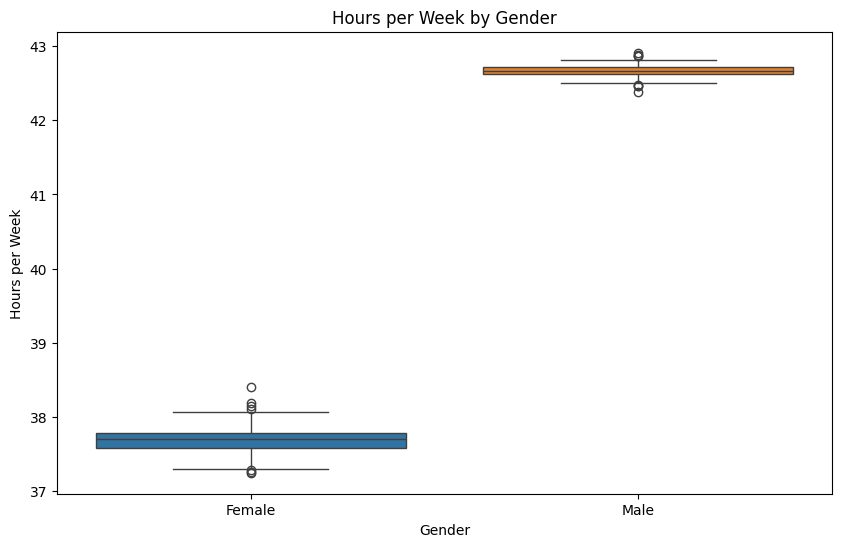

In [21]:
mean_std_df = sampled_means_df.agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_means_df)
plt.title('Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.savefig('e1_eps1.pdf')

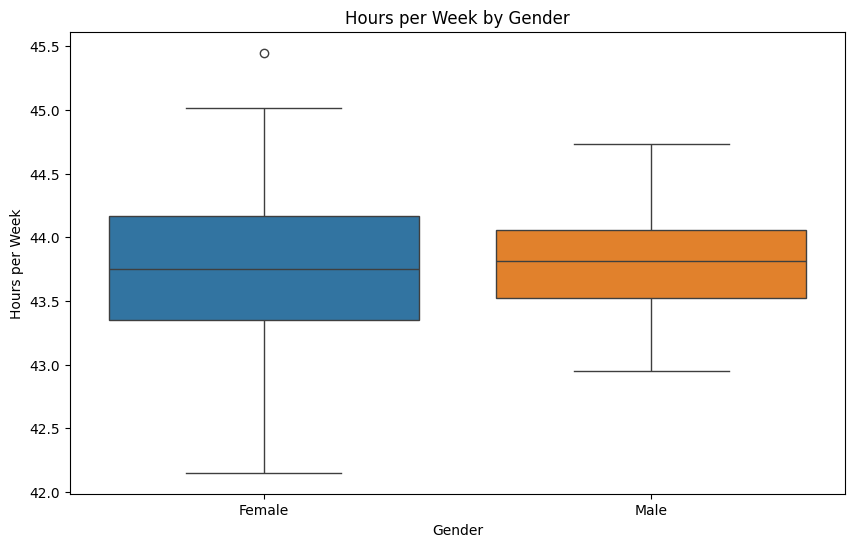

In [28]:
mean_std_df = sampled_means_100_df.agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_means_100_df)
plt.title('Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.savefig('e1_eps100.pdf')

In [20]:
def euclidean_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

x1, y1 = mean_hours_per_week_by_gender['Female'], mean_hours_per_week_by_gender['Male']
x2, y2 = mean_hours_per_week_by_gender_sampled_1['Female'], mean_hours_per_week_by_gender_sampled_1['Male']

euclidean_distance(x1, x2, y1, y2)

0.7777395750938588

## Implement Euclidean distance to compare results

## Do it with a loop (like in TP2), and epsilon=100 too